# Importing Libraries

In [43]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch.nn as nn                                         # Neural Network Module 
from torch.utils.data import TensorDataset, DataLoader        # Used for loading dataframes
import torch.nn.functional as F                               # Used for using activation functions e.g. ReLU

# Loading Data

In [14]:
df = pd.read_csv('iris.data', header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
# Converting categorical column to numeric
target_temp = df['target'].unique()
target_dic = {}
target_count = 0
for i in target_temp:
  target_dic[i] = target_count
  target_count += 1
df['target'].replace(target_dic, inplace=True)
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
torch.manual_seed(4)

# **Splitting the dataset into training and testing sets**

In [16]:
# Getting the dataset features and target label in separate numpy arrays

X = df.drop(['target'], axis=1).values   # features
y = df['target'].values                  # target label

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

*Converting numpy arrays as Tensors*

In [35]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [36]:
X_train[0], y_train[0]

(tensor([5.6000, 2.7000, 4.2000, 1.3000]), tensor(1))

# **Creating Linear Regression Artificial Neural Network Model using PyTorch**

In [49]:
class LR(nn.Module):
  # initiating the class with input features, output features and 2 hidden layers of each 8 & 9 neurons respectively.
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()                      # to inherit all the features/methods of 'nn.Module'
    self.fc1 = nn.Linear(in_features, h1)      # Input Layer  --> fully connected network 1
    self.fc2 = nn.Linear(h1, h2)               # Hidden Layer --> fully connected network 2
    self.out = nn.Linear(h2, out_features)     # Output Layer

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return(x)

In [50]:
model = LR()

<u>*Defining Loss Functions and Optimisers*</u>

In [51]:
criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

## **Model Training**

In [52]:
epochs = 100
losses = []

for epoch in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.item())

  optimiser.zero_grad()    #intimating zero gradient should be taken on optimiser function
  loss.backward()          #differentiating the loss function
  optimiser.step()         #updating the parameters of optimiser such that the loss becomes zero.

  if epoch % 10 == 1:
    print(f'At Epoch {epoch}, the loss is {loss.item()}')

At Epoch 1, the loss is 1.1473792791366577
At Epoch 11, the loss is 1.0071485042572021
At Epoch 21, the loss is 0.8489665985107422
At Epoch 31, the loss is 0.6421517133712769
At Epoch 41, the loss is 0.4040607213973999
At Epoch 51, the loss is 0.20937152206897736
At Epoch 61, the loss is 0.11924804747104645
At Epoch 71, the loss is 0.08735646307468414
At Epoch 81, the loss is 0.07591136544942856
At Epoch 91, the loss is 0.07050473988056183


<u> Plotting the Loss Function </u>

Text(0.5, 1.0, 'Variation of Loss at various Epoch')

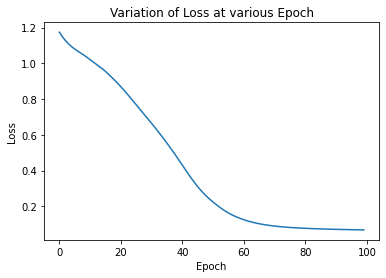

In [53]:
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Variation of Loss at various Epoch')

# Validating the Model

In [54]:
with torch.no_grad():  #intimates backpropagation is not needed by the activation function. Just validating & not training.
  y_pred1 = model.forward(X_test)
  loss_test = criterion(y_pred1, y_test)

print(f'Loss on Testing Data is {loss_test}')

Loss on Testing Data is 0.04945719242095947


We can see that loss on testing data doesn't change very much from the training set, and it also remains closer to zero. This means the model is not over-fit and good to predict values.

# Saving and Loading the Model

In [55]:
torch.save(model, 'Iris_Model')

In [56]:
my_model = torch.load('Iris_Model')

In [57]:
my_model.eval()

LR(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

## **Getting Prediction for unseen Data**

In [73]:
with torch.no_grad():
  pred = my_model(torch.tensor([5.6, 3.7, 2.2, 0.5]))
  print(pred)

print(f'Based on the given details, the resultant category is "{target_temp[pred.argmax().item()]}"')

tensor([  8.5070,   3.8625, -14.0939])
Based on the given details, the resultant category is "Iris-setosa"
